In [19]:
#Import Library
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

###Mounting Dataset from GDrive

In [20]:
# #read zip file
# zip_ref = zipfile.ZipFile('C:/Users/hbc46/OneDrive/바탕 화면/2024년 1학기/캡스톤/MachineLearning/dataset/dogSkinDisease.zip', 'r')

# #unzip the folder, extract its contents into the /tmp folder
# zip_ref.extractall('/tmp')
# zip_ref.close()

In [21]:
#now return the list of the content in that training_set folder
os.listdir('/tmp')

#number of images of each classes in the training_set folder
print(f"There are {len(os.listdir('/tmp/train/flea_allergy'))} train set images of flea allergy.")
print(f"There are {len(os.listdir('/tmp/train/hotspot'))} train set images of hotspot.")
print(f"There are {len(os.listdir('/tmp/train/mange'))} train set images of mange.")
print(f"There are {len(os.listdir('/tmp/train/ringworm'))} train set images of ringworm.")
print()

#now return the list of the content in that validation_set folder
print(f"There are {len(os.listdir('/tmp/validation/flea_allergy'))} val set images of flea allergy.")
print(f"There are {len(os.listdir('/tmp/validation/hotspot'))} val set images of hotspot.")
print(f"There are {len(os.listdir('/tmp/validation/mange'))} val set images of mange.")
print(f"There are {len(os.listdir('/tmp/validation/ringworm'))} val set images of ringworm.")
print()

#now return the list of the content in that test_set folder
print(f"There are {len(os.listdir('/tmp/test/flea_allergy'))} test set images of flea allergy.")
print(f"There are {len(os.listdir('/tmp/test/hotspot'))} test set images of hotspot.")
print(f"There are {len(os.listdir('/tmp/test/mange'))} test set images of mange.")
print(f"There are {len(os.listdir('/tmp/test/ringworm'))} test set images of ringworm.")

There are 76 train set images of flea allergy.
There are 96 train set images of hotspot.
There are 63 train set images of mange.
There are 138 train set images of ringworm.

There are 20 val set images of flea allergy.
There are 20 val set images of hotspot.
There are 20 val set images of mange.
There are 20 val set images of ringworm.

There are 20 test set images of flea allergy.
There are 20 test set images of hotspot.
There are 20 test set images of mange.
There are 20 test set images of ringworm.


###Train Val Generator

In [22]:
TRAINING_DIR = "/tmp/train"
VALIDATION_DIR = "/tmp/validation"
test_DIR = "/tmp/test"

TRAINING_FLEA_DIR = "/tmp/train/flea_allergy"
VALIDATION_FLEA_DIR = "/tmp/validation/flea_allergy"
TEST_FLEA_DIR = "/tmp/test/flea_allergy"

TRAINING_HOTSPOT_DIR = "/tmp/train/hotspot"
VALIDATION_HOTSPOT_DIR = "/tmp/validation/hotspot"
test_HOTSPOT_DIR = "/tmp/test/hotspot"

TRAINING_MANGE_DIR = "/tmp/train/mange"
VALIDATION_MANGE_DIR = "/tmp/validation/mange"
test_MANGE_DIR = "/tmp/test/mange"

TRAINING_RINGWORM_DIR = "/tmp/train/ringworm"
VALIDATION_RINGWORM_DIR = "/tmp/validation/ringworm"
test_RINGWORM_DIR = "/tmp/test/ringworm"

In [23]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                     fill_mode='nearest',
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     brightness_range=[0.8, 1.2]
                                     )
  # train_datagen = ImageDataGenerator(
        # rescale=1./255,  # 픽셀 값을 [0, 255]에서 [0, 1]로 스케일링
        # rotation_range=40,  # 이미지를 0~40도 사이로 무작위 회전
        # width_shift_range=0.2,  # 이미지를 전체 너비의 20%까지 수평 이동
        # height_shift_range=0.2,  # 이미지를 전체 높이의 20%까지 수직 이동
        # shear_range=0.2,  # 이미지를 0.2 라디안 내외로 전단 변환
        # zoom_range=0.2,  # 1-0.2 ~ 1+0.2 사이로 이미지를 무작위로 확대/축소
        # horizontal_flip=True,  # 이미지를 수평으로 무작위로 뒤집기
        # vertical_flip=False,  # 이미지를 수직으로 뒤집지 않음 (선택적 사용)
        # fill_mode='nearest',  # 회전이나 너비/높이 이동 후 생기는 공간을 인접한 픽셀로 채움
        # brightness_range=[0.8, 1.2],  # 이미지 밝기를 0.8~1.2 범위로 무작위 조정
        # channel_shift_range=20.0,  # 색상 채널을 최대 20까지 무작위로 이동
        # featurewise_center=True,  # 데이터셋 전체의 평균을 0으로 설정하지 않음
        # samplewise_center=True,  # 각 샘플의 평균을 0으로 설정하지 않음
        # featurewise_std_normalization=True,  # 데이터셋을 표준편차로 나누지 않음
        # samplewise_std_normalization=True  # 각 샘플을 표준편차로 나누지 않음
    # )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=16,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1.0 / 255. )

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=16,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [24]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 373 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


###Show Sample Images

In [25]:
#create function to show image examples
def show_image_samples(gen):
  train_dict = train_generator.class_indices
  classes = list(train_dict.keys())
  images, labels = next(gen) #get a sample batch from generator
  plt.figure(figsize=(20,20))
  length = len(labels)
  if length < 10:
    r = length
  else:
    r = 10
  for i in range(r):
    plt.subplot(5, 5, i+1)
    image = images[i]
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='black', fontsize=18)
    plt.axis('off')
  plt.show()



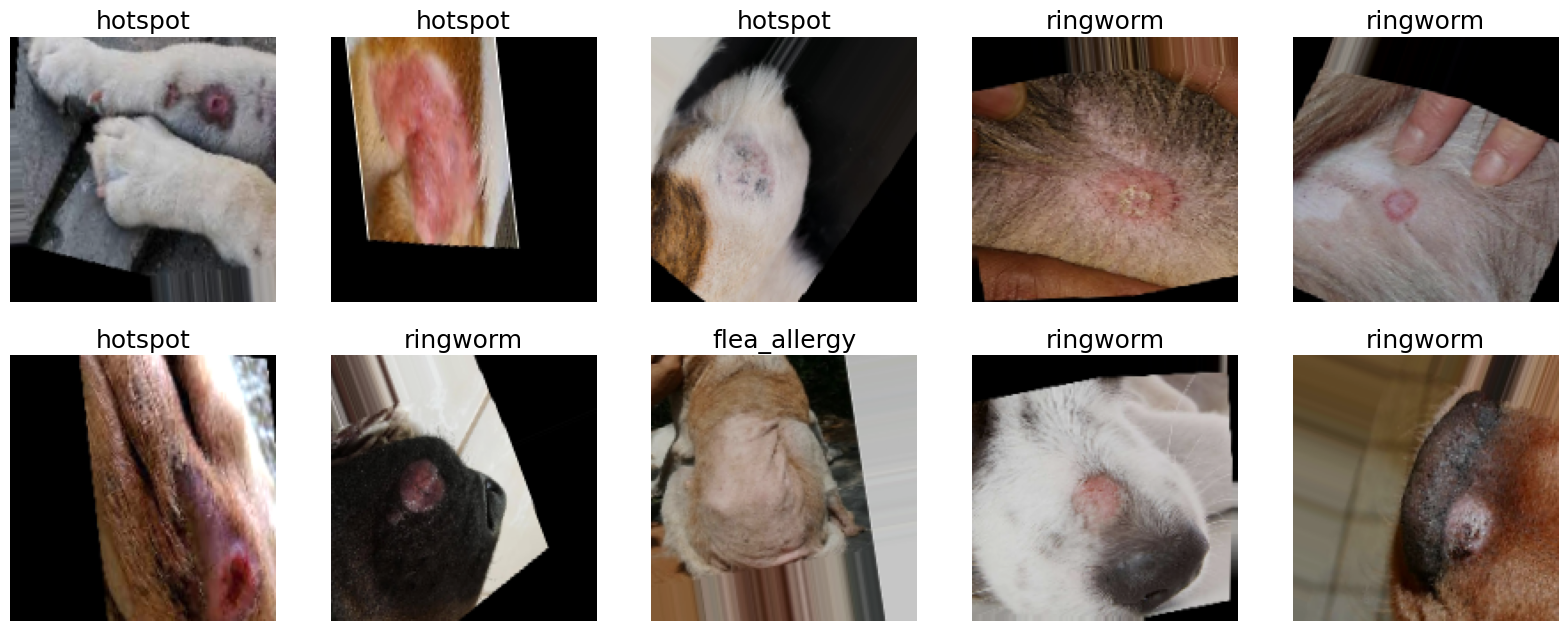

In [26]:
show_image_samples(train_generator)

###Modelling CNN Sederhana

In [67]:
# def create_model():

#   model = tf.keras.models.Sequential([ 
#       tf.keras.layers.Conv2D(8, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(150, 150, 3)),
#       tf.keras.layers.MaxPooling2D(2,2),

#       tf.keras.layers.Dense(16, activation='relu'),
#       #tf.keras.layers.Dropout(0.2),

#       tf.keras.layers.Flatten(),
      
#       tf.keras.layers.Dense(32, activation='relu'),
#       tf.keras.layers.Dense(4, activation='softmax')                           
#   ])

#   model.compile(optimizer=tf.keras.optimizers.Adam(),
#                 loss='categorical_crossentropy',
#                 metrics=['accuracy']) 

#   return model
def create_model():
    model = tf.keras.models.Sequential([
        # 첫 번째 합성곱 층
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),

        # 두 번째 합성곱 층
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        # 세 번째 합성곱 층
        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        # 네 번째 합성곱 층
        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        # 드롭아웃과 플랫텐 층
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),

        # 완전 연결 층
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')  # 클래스 수에 맞게 출력층 조정
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [68]:
model = create_model()

C:\Users\hbc46\anaconda3\envs\cap\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,454,660 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10, 
    min_delta=0.0001,
    verbose=1,
)

# Model Checkpoint
checkpoint_path = 'model_checkpoints/SkinDisease.weights.h5'  # 확장자 변경
checkpoint_dir = os.path.dirname(checkpoint_path)

# 폴더가 존재하지 않는 경우 생성
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)


In [72]:
history = model.fit(train_generator,
            epochs=100,
            validation_data=validation_generator,
            verbose = 1,
            callbacks = [early_stopping, checkpoint])

Epoch 1/100


C:\Users\hbc46\anaconda3\envs\cap\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.3169 - loss: 1.4683
Epoch 1: val_loss improved from inf to 1.42400, saving model to model_checkpoints/SkinDisease.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 315ms/step - accuracy: 0.3177 - loss: 1.4656 - val_accuracy: 0.2500 - val_loss: 1.4240
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.3688 - loss: 1.3604
Epoch 2: val_loss improved from 1.42400 to 1.38402, saving model to model_checkpoints/SkinDisease.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 296ms/step - accuracy: 0.3689 - loss: 1.3601 - val_accuracy: 0.2500 - val_loss: 1.3840
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.4106 - loss: 1.3307
Epoch 3: val_loss improved from 1.38402 to 1.38398, saving model to model_checkpoints/SkinDisease.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.4089 - loss: 1.3312 - val_accuracy: 0.2625 - val_loss: 1.3840
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.3868 - lo

###Plot dan Evaluasi

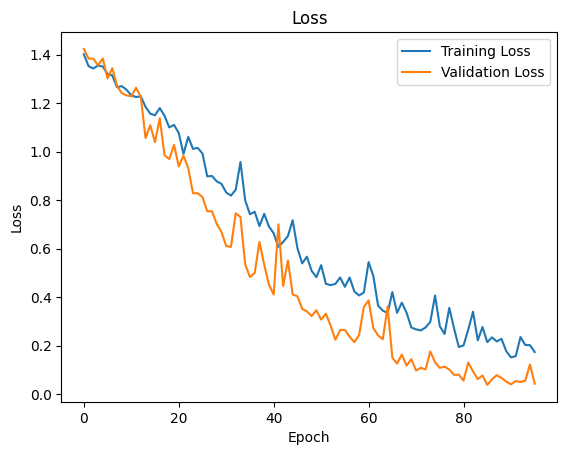

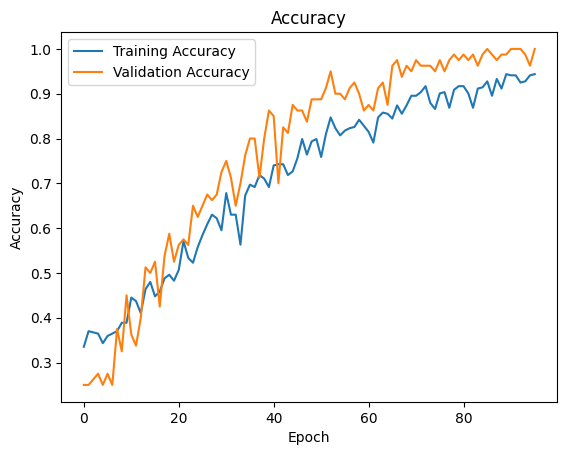

In [73]:
# Obtain training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Draw loss plot
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()
print()

# Draw accuracy plot
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [28]:
TEST_DIR = "/tmp/test"
test_datagen = ImageDataGenerator(rescale = 1.0 / 255. )

# pass in the appropriate arguments to the flow_from_directory method
test_set_2 = test_datagen.flow_from_directory(directory=TEST_DIR,
                                                      batch_size=16,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

Found 80 images belonging to 4 classes.


In [32]:
# Y_pred_2 = model.predict(test_set_2)
label, Y_pred_2 = ensemble_predict(models, test_set_2)
y_pred_2 = np.argmax(Y_pred_2, axis=1)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step

C:\Users\hbc46\anaconda3\envs\cap\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


IndexError: list index out of range

In [33]:
print(classification_report(test_set_2.classes, y_pred_2))

NameError: name 'y_pred_2' is not defined

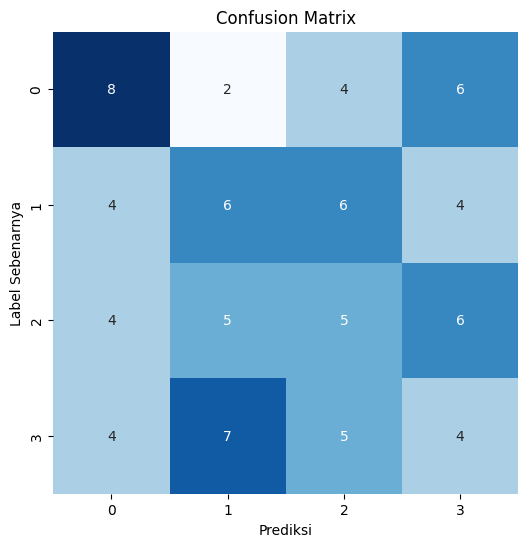

In [77]:
# Misalkan test_set_2.classes adalah label yang sebenarnya dan y_pred_2 adalah label prediksi
y_true = test_set_2.classes  # Label yang sebenarnya
y_pred = y_pred_2  # Label prediksi

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Menampilkan confusion matrix dalam bentuk heatmap
class_names = ['0', '1', '2', '3']  # Nama kelas (sesuaikan dengan kelas Anda)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediksi')
plt.ylabel('Label Sebenarnya')
plt.title('Confusion Matrix')
plt.show()

###Save Model h5

In [78]:
#Save model to h5 format

model.save("SkinDisease5.h5")

###Predict New Images


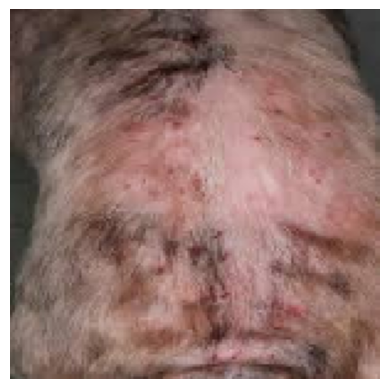

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

The image is detected as flea_allergy






In [93]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image

def load_image(img_path, show=False):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    if show:
        imgplot = plt.imshow(img)
        plt.axis('off')
        plt.show()
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

def predict_image(model, img):
    prediction = model.predict(img)
    class_labels = ['flea_allergy', 'hotspot', 'mange', 'ringworm']
    predicted_class = class_labels[np.argmax(prediction)]
    return predicted_class, prediction

# 이미지 파일 경로 직접 지정
img_path = 'flea_allergy.jpg'  # 사용자의 이미지 경로로 변경

# 이미지 로드 및 출력
img = load_image(img_path, show=True)

# 모델 로드 (적절한 모델 파일 경로 지정 필요)
model = tf.keras.models.load_model('SkinDisease5.h5')

# 이미지 예측
label, predictions = predict_image(model, img)

print("\nThe image is detected as " + label)
print('\n')
print('\n')


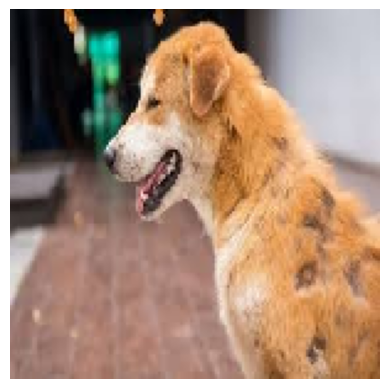

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step

The image is detected as mange






In [34]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image

def load_image(img_path, show=False):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    if show:
        imgplot = plt.imshow(img)
        plt.axis('off')
        plt.show()
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

def ensemble_predict(models, img):
    # 여러 모델의 예측을 평균 내어 최종 예측을 수행합니다.
    predictions = np.array([model.predict(img) for model in models])
    avg_predictions = np.mean(predictions, axis=0)
    class_labels = ['flea_allergy', 'hotspot', 'mange', 'ringworm']
    predicted_class = class_labels[np.argmax(avg_predictions)]
    return predicted_class, avg_predictions

# 이미지 파일 경로 직접 지정
img_path = 'mange.jpg'  # 사용자의 이미지 경로로 변경

# 이미지 로드 및 출력
img = load_image(img_path, show=True)

# 모델들을 로드 (적절한 모델 파일 경로 지정 필요)
models = [
    tf.keras.models.load_model('SkinDisease-S.h5'),
    tf.keras.models.load_model('SkinDisease2-S.h5'),
    # tf.keras.models.load_model('SkinDisease3.h5'),
    # tf.keras.models.load_model('SkinDisease4.h5'),
    tf.keras.models.load_model('SkinDisease5-S.h5')
]

# 이미지에 대해 앙상블 예측 수행
label, predictions = ensemble_predict(models, img)

print("\nThe image is detected as " + label)
print('\n')
print('\n')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ensemble_predict 함수는 위에서 제공된 것을 그대로 사용합니다.
# ...

def generate_predictions(models, test_set):
    y_pred = []
    for i in range(len(test_set.filenames)):
        img_path = test_set.directory + '/' + test_set.filenames[i]
        img = load_image(img_path)
        label, _ = ensemble_predict(models, img)
        y_pred.append(label)
    return y_pred

# 테스트 데이터 세트 로드 (적절한 경로와 파라미터 설정 필요)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_dir = TEST_DIR  # 테스트 데이터 디렉토리 경로 지정
test_set = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    shuffle=False  # 중요: 파일 순서를 유지해야 실제 레이블과 일치
)

# 모델들을 로드
models = [
    tf.keras.models.load_model('SkinDisease-S.h5'),
    tf.keras.models.load_model('SkinDisease2-S.h5'),
    tf.keras.models.load_model('SkinDisease5-S.h5')
]

# 앙상블 모델을 사용하여 테스트 세트에 대한 예측을 생성
y_pred = generate_predictions(models, test_set)

# 실제 레이블은 test_set.classes에서 가져올 수 있지만, 이는 숫자 형태이므로 문자열 레이블로 변환 필요
class_labels = ['flea_allergy', 'hotspot', 'mange', 'ringworm']
y_true_labels = [class_labels[idx] for idx in test_set.classes]
y_pred_labels = y_pred  # 예측 레이블은 이미 문자열 형태

# 문자열 레이블을 숫자 형태로 변환
y_true_numeric = [class_labels.index(label) for label in y_true_labels]
y_pred_numeric = [class_labels.index(label) for label in y_pred_labels]

# 혼동 행렬 계산 및 시각화
cm = confusion_matrix(y_true_numeric, y_pred_numeric)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('예측')
plt.ylabel('실제')
plt.title('혼동 행렬')
plt.show()


Found 80 images belonging to 4 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━